In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tips (data for regression problem).csv')  # Replace 'your_dataset.csv' with the actual file path


print(data.head())

# One-hot encode categorical variables: 'sex', 'smoker', 'day', 'time'
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop(columns='tip')
y = data_encoded['tip']


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model performance
model_performance = {}

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance
    model_performance[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }

# Display the performance of each model
for model_name, metrics in model_performance.items():
    print(f"\n{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  R-squared (R^2): {metrics['R^2']}")



Linear Regression:
  Mean Absolute Error (MAE): 0.6671331480264893
  Mean Squared Error (MSE): 0.7033566017436106
  R-squared (R^2): 0.43730181943482493

Decision Tree:
  Mean Absolute Error (MAE): 0.8295918367346939
  Mean Squared Error (MSE): 1.2551938775510205
  R-squared (R^2): -0.004178121600921791

Random Forest:
  Mean Absolute Error (MAE): 0.7557163265306125
  Mean Squared Error (MSE): 0.9196720148979602
  R-squared (R^2): 0.2642455218065466

Support Vector Regression:
  Mean Absolute Error (MAE): 0.5679864502285389
  Mean Squared Error (MSE): 0.5323763062616395
  R-squared (R^2): 0.5740891915042663

K-Nearest Neighbors:
  Mean Absolute Error (MAE): 0.718857142857143
  Mean Squared Error (MSE): 0.8763725714285714
  R-squared (R^2): 0.29888587066985495


In [23]:
import numpy as np

# 1. Using Linear Regression coefficients
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get feature names and coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

# Display coefficients to interpret significance
print("Linear Regression Feature Coefficients:")
print(feature_coefficients.sort_values(by="Coefficient", ascending=False))

# 2. Using Random Forest feature importances
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Display feature importances to interpret significance
print("\nRandom Forest Feature Importances:")
print(feature_importances.sort_values(by="Importance", ascending=False))



Linear Regression Feature Coefficients:
      Feature  Coefficient
1        size     0.233484
7  time_Lunch     0.094957
0  total_bill     0.094700
2    sex_Male     0.028819
5     day_Sun    -0.050793
6    day_Thur    -0.179721
4     day_Sat    -0.185785
3  smoker_Yes    -0.192353

Random Forest Feature Importances:
      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


Based on the feature coefficients and importances from both the Linear Regression and Random Forest models, here are some actionable insights for improving customer service and revenue management:

Focus on Bill Size and Customer Group Size:

Both models show that the total bill and size of the customer group are important factors influencing tips. Larger group sizes and higher bills correlate with higher tips, suggesting that prioritizing larger parties or customers with higher spending may improve revenue.
Consider Time of Day (Lunch vs. Dinner):

The time of day (Lunch) has a positive coefficient in the Linear Regression model, indicating that tips tend to be higher during lunch hours. To optimize revenue, consider strategies like promoting lunch specials or enhancing lunch-time service to attract more customers.
Customer Demographics:

Both smoking preference and gender appear in both models, although with relatively lower importance. This may suggest subtle differences in tipping behavior based on these demographics. Staff training to accommodate different preferences (like smoking areas) might improve customer satisfaction, which could lead to better tips.
Day of the Week Promotions:

The Linear Regression model shows that tips tend to be lower on Thursdays and Saturdays. Running targeted promotions on these days (e.g., discount nights, special offers) could boost customer flow and improve tips.

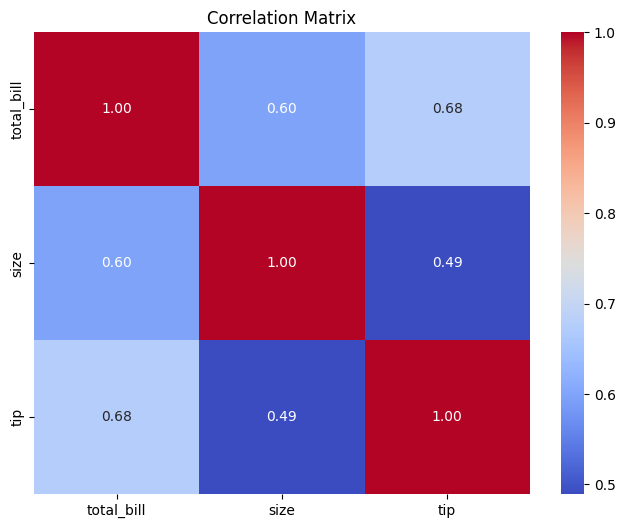

In [24]:
# Correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
correlation_matrix = data[['total_bill', 'size', 'tip']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


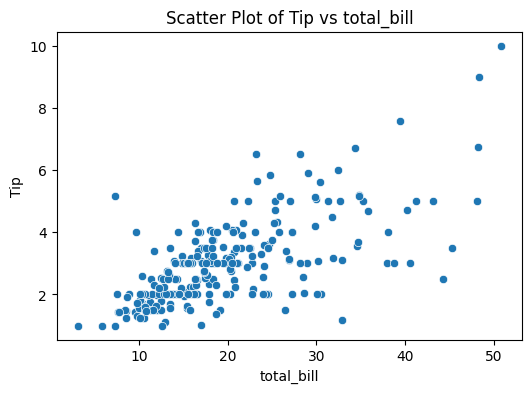

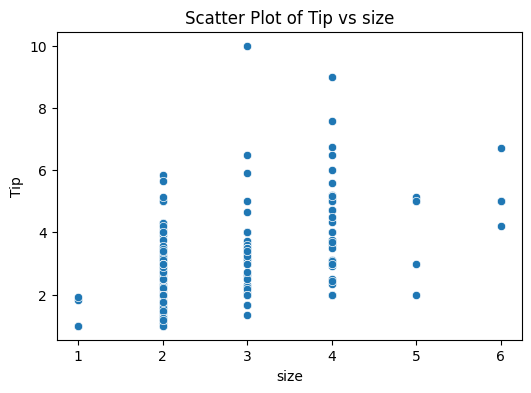

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each numerical feature against 'tip'
numerical_features = ['total_bill', 'size']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data['tip'])
    plt.title(f'Scatter Plot of Tip vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tip')
    plt.show()


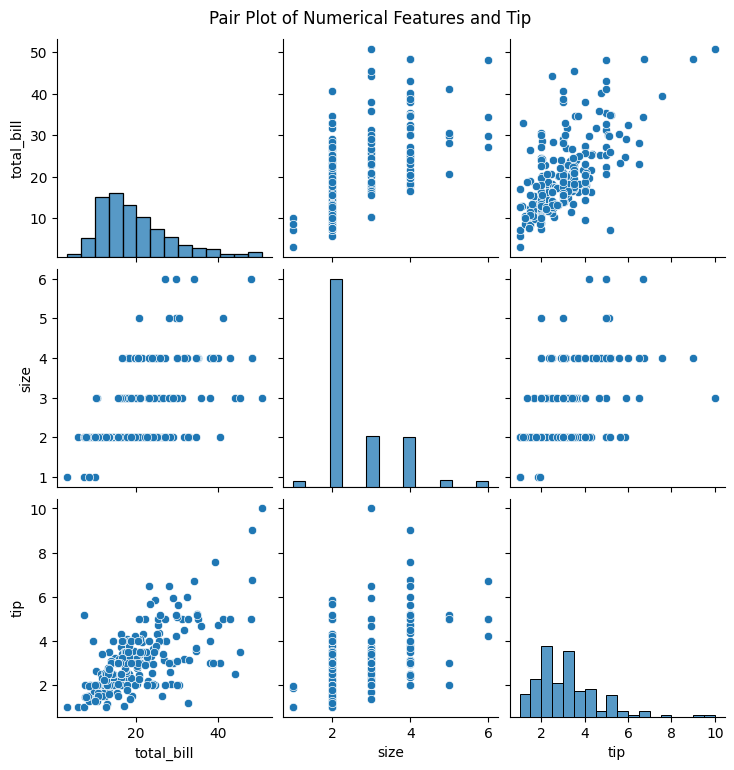

In [26]:
# Pair plot for numerical features and target variable
sns.pairplot(data[['total_bill', 'size', 'tip']])
plt.suptitle("Pair Plot of Numerical Features and Tip", y=1.02)
plt.show()


In [27]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.preprocessing import StandardScaler


df_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']

# Scale numeric columns
scaler = StandardScaler()
X[['total_bill', 'size']] = scaler.fit_transform(X[['total_bill', 'size']])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Check for and replace any non-finite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y = y.replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert to numpy arrays of type float
X_np = X.to_numpy().astype(float)
y_np = y.to_numpy().astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Rainbow test for linearity
try:
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    rainbow_stat, rainbow_p_val = linear_rainbow(model)
    print(f"Rainbow test statistic: {rainbow_stat}")
    print(f"Rainbow test p-value: {rainbow_p_val}")
    if rainbow_p_val > 0.05:
        print("No significant deviation from linearity (p > 0.05).")
    else:
        print("Significant deviation from linearity (p <= 0.05).")
except Exception as e:
    print(f"An error occurred: {e}")


Rainbow test statistic: 1.549399494179733
Rainbow test p-value: 0.018647408553123496
Significant deviation from linearity (p <= 0.05).
